# 📊 Placement Prediction using Machine Learning

## Project Overview
This project aims to predict whether a student will get placed based on academic, demographic, and profile-related features.
The project follows a complete data science workflow starting from data understanding and EDA to model training and validation.

### Objectives
- Understand the structure and quality of the placement dataset
- Perform exploratory data analysis (EDA)
- Preprocess data for machine learning
- Train and evaluate classification models
- Identify key factors affecting student placement


In [ ]:
import sys
print(sys.executable)

#!{sys.executable} -m pip install scikit-learn


c:\Users\Sneha\AppData\Local\Programs\Python\Python310\python.exe



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Loading the Dataset

We load the training and test datasets provided in CSV format.
The training dataset contains both features and the target variable,
while the test dataset is used for generating predictions on unseen data.


In [ ]:

train_df = pd.read_csv(r"E:\Placement_Prediction\Data\train.csv")
test_df = pd.read_csv(r"E:\Placement_Prediction\Data\test.csv")

## 🔍 Initial Data Inspection

In this step, we inspect:
- Number of rows and columns
- Column names
- Data types
- Presence of missing values

This helps in understanding the structure of the dataset and planning preprocessing steps.


In [66]:
train_df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [68]:
train_df.shape

(45000, 15)

In [69]:
train_df.columns

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')

In [70]:
train_df.info

<bound method DataFrame.info of        Student_ID  Age  Gender  Degree Branch  CGPA  Internships  Projects  \
0            1048   22  Female  B.Tech    ECE  6.29            0         3   
1           37820   20  Female     BCA    ECE  6.05            1         4   
2           49668   22    Male     MCA     ME  7.22            1         4   
3           19467   22    Male     MCA     ME  7.78            2         4   
4           23094   20  Female  B.Tech     ME  7.63            1         4   
...           ...  ...     ...     ...    ...   ...          ...       ...   
44995        9362   20    Male     MCA  Civil  7.84            2         5   
44996        8940   19  Female    B.Sc     ME  8.28            1         4   
44997       13097   20  Female    B.Sc  Civil  8.88            0         4   
44998       12958   24  Female     MCA    ECE  5.90            1         3   
44999        9565   23  Female  B.Tech     ME  6.28            0         4   

       Coding_Skills  Communica

In [ ]:

print(train_df.columns)

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')


In [75]:
train_df.isnull().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

In [78]:
print(train_df.columns)

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')


## 🎯 Target Variable Identification

The target variable represents the placement outcome of a student.
This is a **binary classification problem**, where:

- 1 → Student is placed
- 0 → Student is not placed

We examine the distribution of the target variable to check for class imbalance.


In [79]:
train_df['Placement_Status'].value_counts()

Placement_Status
Not Placed    28688
Placed        16312
Name: count, dtype: int64

## 📊 Exploratory Data Analysis (EDA)

EDA is performed to understand patterns, relationships, and trends in the data.

Key analyses include:
- Distribution of placement outcomes
- Relationship between academic performance (CGPA) and placement
- Identification of potential imbalance or outliers


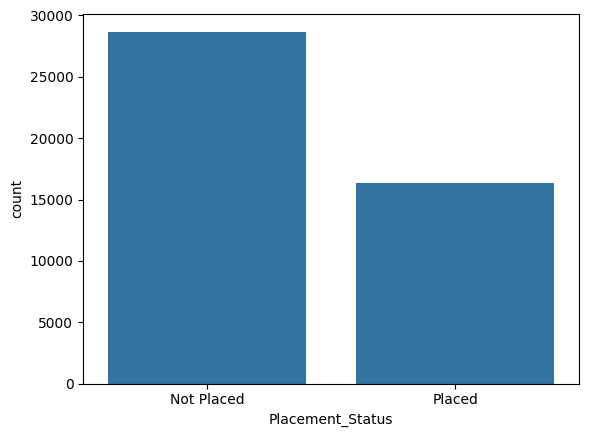

In [80]:
sns.countplot(x='Placement_Status',data=train_df)
plt.show()

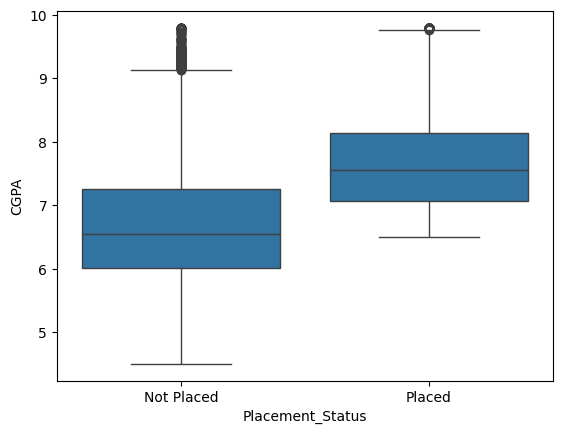

In [81]:
sns.boxplot(x='Placement_Status', y='CGPA', data = train_df)
plt.show()

In [82]:
X= train_df.drop('Placement_Status',axis = 1)
Y = train_df['Placement_Status']

In [83]:
X_test = test_df.drop('Placement_Status', axis=1)

In [84]:
X.isnull().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
dtype: int64

## 🧠 Feature Analysis

The dataset contains both:
- **Numerical features** (e.g., CGPA, scores)
- **Categorical features** (e.g., branch, gender, work experience)

Since machine learning models require numerical inputs,
categorical features will be encoded during preprocessing.


In [85]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    X[col].fillna(X[col].mean(),inplace=True)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\4224795135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(),inplace=True)


In [86]:
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col].fillna(X[col].mode()[0],inplace=True)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\3931613401.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0],inplace=True)


## 🧹 Data Preprocessing

Data preprocessing steps include:
- Handling missing values
  - Numerical features → filled using mean
  - Categorical features → filled using mode
- Encoding categorical variables into numerical format
- Feature scaling to normalize input ranges

These steps ensure the data is suitable for machine learning models.


In [87]:
X.isnull().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
dtype: int64

In [88]:
#Convert categorical text to num

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])
    

In [89]:
X.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
0,1048,22,0,1,2,6.29,0,3,4,6,51,5,1,3
1,37820,20,0,2,2,6.05,1,4,6,8,59,8,2,1
2,49668,22,1,3,4,7.22,1,4,6,6,58,6,2,2
3,19467,22,1,3,4,7.78,2,4,6,6,90,4,2,0
4,23094,20,0,1,4,7.63,1,4,6,5,79,6,2,0


In [90]:
X_test = test_df.copy()

In [91]:
for col in num_cols:
    X_test[col].fillna(X[col].mean(), inplace=True)

for col in cat_cols:
    X_test[col].fillna(X[col].mode()[0], inplace=True)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\3173661291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test[col].fillna(X[col].mean(), inplace=True)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\3173661291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [92]:
for col in cat_cols:
    X_test[col] = le.fit_transform(X_test[col])


In [93]:
X_test = test_df.drop('Placement_Status', axis=1)


In [94]:
print(list(X.columns))
print(list(X_test.columns))


['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA', 'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications', 'Backlogs']
['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA', 'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications', 'Backlogs']


In [95]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

for col in num_cols:
    X[col].fillna(X[col].mean(), inplace=True)
    X_test[col].fillna(X[col].mean(), inplace=True)

for col in cat_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)
    X_test[col].fillna(X[col].mode()[0], inplace=True)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\773830732.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_19356\773830732.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [96]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.transform(X_test[col])  # not fit_transform here
    encoders[col] = le


In [97]:

X_test = X_test[X.columns]


## 🔀 Train–Validation Split

To evaluate model performance realistically, the training data is split into:
- Training set (80%)
- Validation set (20%)

This helps prevent overfitting and provides an unbiased evaluation of the model.


In [98]:
# 1. recreate X and y from train
X = train_df.drop('Placement_Status', axis=1)
y = train_df['Placement_Status']

# 2. recreate X_test from test in the same way
X_test = test_df.drop('Placement_Status', axis=1)

# 3. find column types from X (train defines everything)
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 4. fill missing values using train statistics
for col in num_cols:
    X[col] = X[col].fillna(X[col].mean())
    X_test[col] = X_test[col].fillna(X[col].mean())

for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    X_test[col] = X_test[col].fillna(X[col].mode()[0])

# 5. encode categoricals consistently (fit on train, apply to test)
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le

# 6. force identical column order
X_test = X_test[X.columns]

# 7. scale (fit on train, transform test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_scaled.shape)
print("Test shape :", X_test_scaled.shape)


Train shape: (45000, 14)
Test shape : (5000, 14)


In [99]:
print(X_scaled.shape)
print(X_test_scaled.shape)
print(y.value_counts())


(45000, 14)
(5000, 14)
Placement_Status
Not Placed    28688
Placed        16312
Name: count, dtype: int64


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [101]:
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [102]:
y_pred_train = model.predict(X_scaled)


In [103]:
train_acc = accuracy_score(y, y_pred_train)
print("Training Accuracy:", train_acc)


Training Accuracy: 0.8677555555555555


In [104]:
print(classification_report(y, y_pred_train))
print(confusion_matrix(y, y_pred_train))


              precision    recall  f1-score   support

  Not Placed       0.89      0.90      0.90     28688
      Placed       0.82      0.81      0.82     16312

    accuracy                           0.87     45000
   macro avg       0.86      0.86      0.86     45000
weighted avg       0.87      0.87      0.87     45000

[[25851  2837]
 [ 3114 13198]]


In [105]:
test_predictions = model.predict(X_test_scaled)


In [106]:
submission = test_df.copy()
submission['Predicted_Placement'] = test_predictions
submission.to_csv("test_predictions.csv", index=False)


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y,
    test_size=0.2,      # 20% for validation
    random_state=42,
    stratify=y          # keep placed/not-placed ratio same
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)


Train size: (36000, 14)
Validation size: (9000, 14)


## 🤖 Model Training

Two classification models are trained and compared:

1. **Logistic Regression**
   - Simple baseline model
   - Easy to interpret

2. **Random Forest Classifier**
   - Ensemble-based model
   - Handles non-linear relationships well

Both models are evaluated using validation accuracy and classification metrics.


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_val_pred_log = log_model.predict(X_val)

print("Logistic Validation Accuracy:",
      accuracy_score(y_val, y_val_pred_log))

print(classification_report(y_val, y_val_pred_log))


Logistic Validation Accuracy: 0.8647777777777778
              precision    recall  f1-score   support

  Not Placed       0.89      0.90      0.89      5738
      Placed       0.82      0.81      0.81      3262

    accuracy                           0.86      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.86      0.86      0.86      9000



In [109]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)

print("Random Forest Validation Accuracy:",
      accuracy_score(y_val, y_val_pred_rf))

print(classification_report(y_val, y_val_pred_rf))


Random Forest Validation Accuracy: 1.0
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      5738
      Placed       1.00      1.00      1.00      3262

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [110]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance.head(10))


Communication_Skills    0.310235
Backlogs                0.176307
CGPA                    0.155415
Projects                0.108058
Coding_Skills           0.093252
Certifications          0.070843
Aptitude_Test_Score     0.064600
Internships             0.009074
Student_ID              0.004454
Branch                  0.002166
dtype: float64


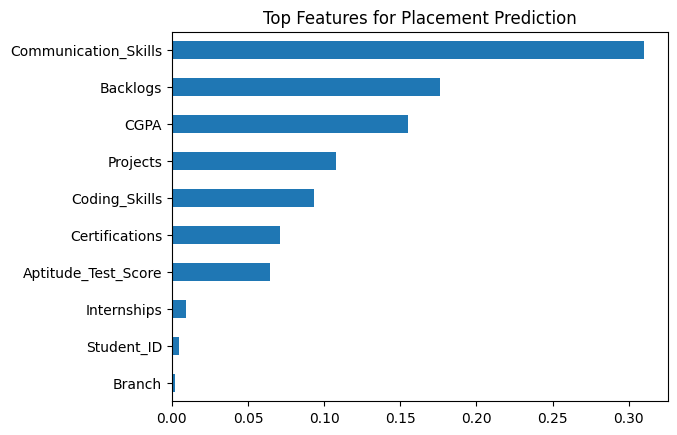

In [111]:
feature_importance.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Features for Placement Prediction")
plt.show()


In [112]:
final_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

final_model.fit(X_scaled, y)

final_test_predictions = final_model.predict(X_test_scaled)
